In [2]:
PATH = "Credit Score Classification Dataset.csv"
dataset = pd.read_csv(PATH)
dataset

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29,Female,27500,High School Diploma,Single,0,Rented,Low
160,34,Male,47500,Associate's Degree,Single,0,Rented,Average
161,39,Female,62500,Bachelor's Degree,Married,2,Owned,High
162,44,Male,87500,Master's Degree,Single,0,Owned,High


In [3]:

X_numerical = ['Income', 'Number of Children', 'Age']
X_categorical  = ['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

label_encoder = LabelEncoder()
for cat in X_categorical:
    dataset[cat] = label_encoder.fit_transform(dataset[cat])
    
dataset.to_csv('ipr2.zip', index=False)
scaler = StandardScaler()

dataset[X_numerical] = scaler.fit_transform(dataset[X_numerical])

dataset

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,-1.535320,0,-1.043483,1,1,-0.740862,1,1
1,-0.943702,1,0.501720,4,0,1.530191,0,1
2,-0.352085,0,-0.270882,2,0,0.394665,0,1
3,0.239533,1,1.274322,3,1,-0.740862,0,1
4,0.831151,0,0.501720,1,0,2.665717,0,1
...,...,...,...,...,...,...,...,...
159,-1.062026,0,-1.738825,3,1,-0.740862,1,2
160,-0.470408,1,-1.120744,0,1,-0.740862,1,0
161,0.121209,0,-0.657183,1,0,1.530191,0,1
162,0.712827,1,0.115419,4,1,-0.740862,0,1


<Axes: >

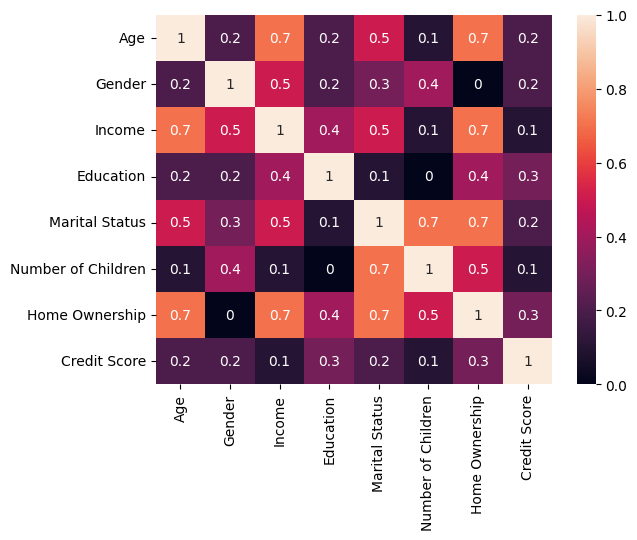

In [4]:
sns.heatmap(
    round(abs(dataset.corr()),1,),
    annot=True
)

In [5]:
train_input, test_input, train_output, test_output = train_test_split(
    dataset.drop("Credit Score", axis=1),
    dataset["Credit Score"],
    test_size=0.2
)

Text(0.5, 1.0, 'Матрица сходства')

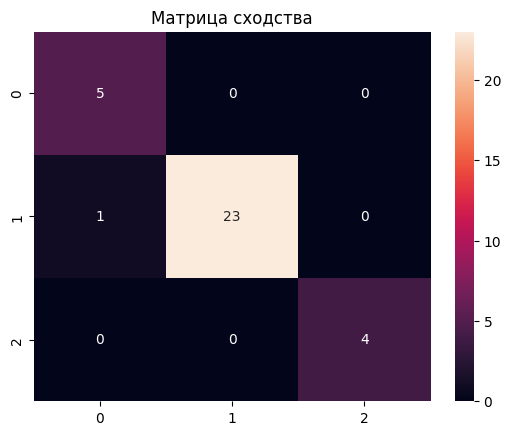

In [6]:
model = tree.DecisionTreeClassifier()
model.fit(train_input, train_output)
predictions = model.predict(test_input)
confusion_matrix = sklearn.metrics.confusion_matrix(predictions, test_output)
sns.heatmap(
confusion_matrix,
annot=True
)
plt.title('Матрица сходства')

|--- Home Ownership <= 0.50
|   |--- Age <= -1.18
|   |   |--- class: 0
|   |--- Age >  -1.18
|   |   |--- class: 1
|--- Home Ownership >  0.50
|   |--- Income <= -1.39
|   |   |--- class: 2
|   |--- Income >  -1.39
|   |   |--- Income <= -0.12
|   |   |   |--- Age <= -1.48
|   |   |   |   |--- Income <= -0.97
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Income >  -0.97
|   |   |   |   |   |--- class: 0
|   |   |   |--- Age >  -1.48
|   |   |   |   |--- class: 0
|   |   |--- Income >  -0.12
|   |   |   |--- class: 1


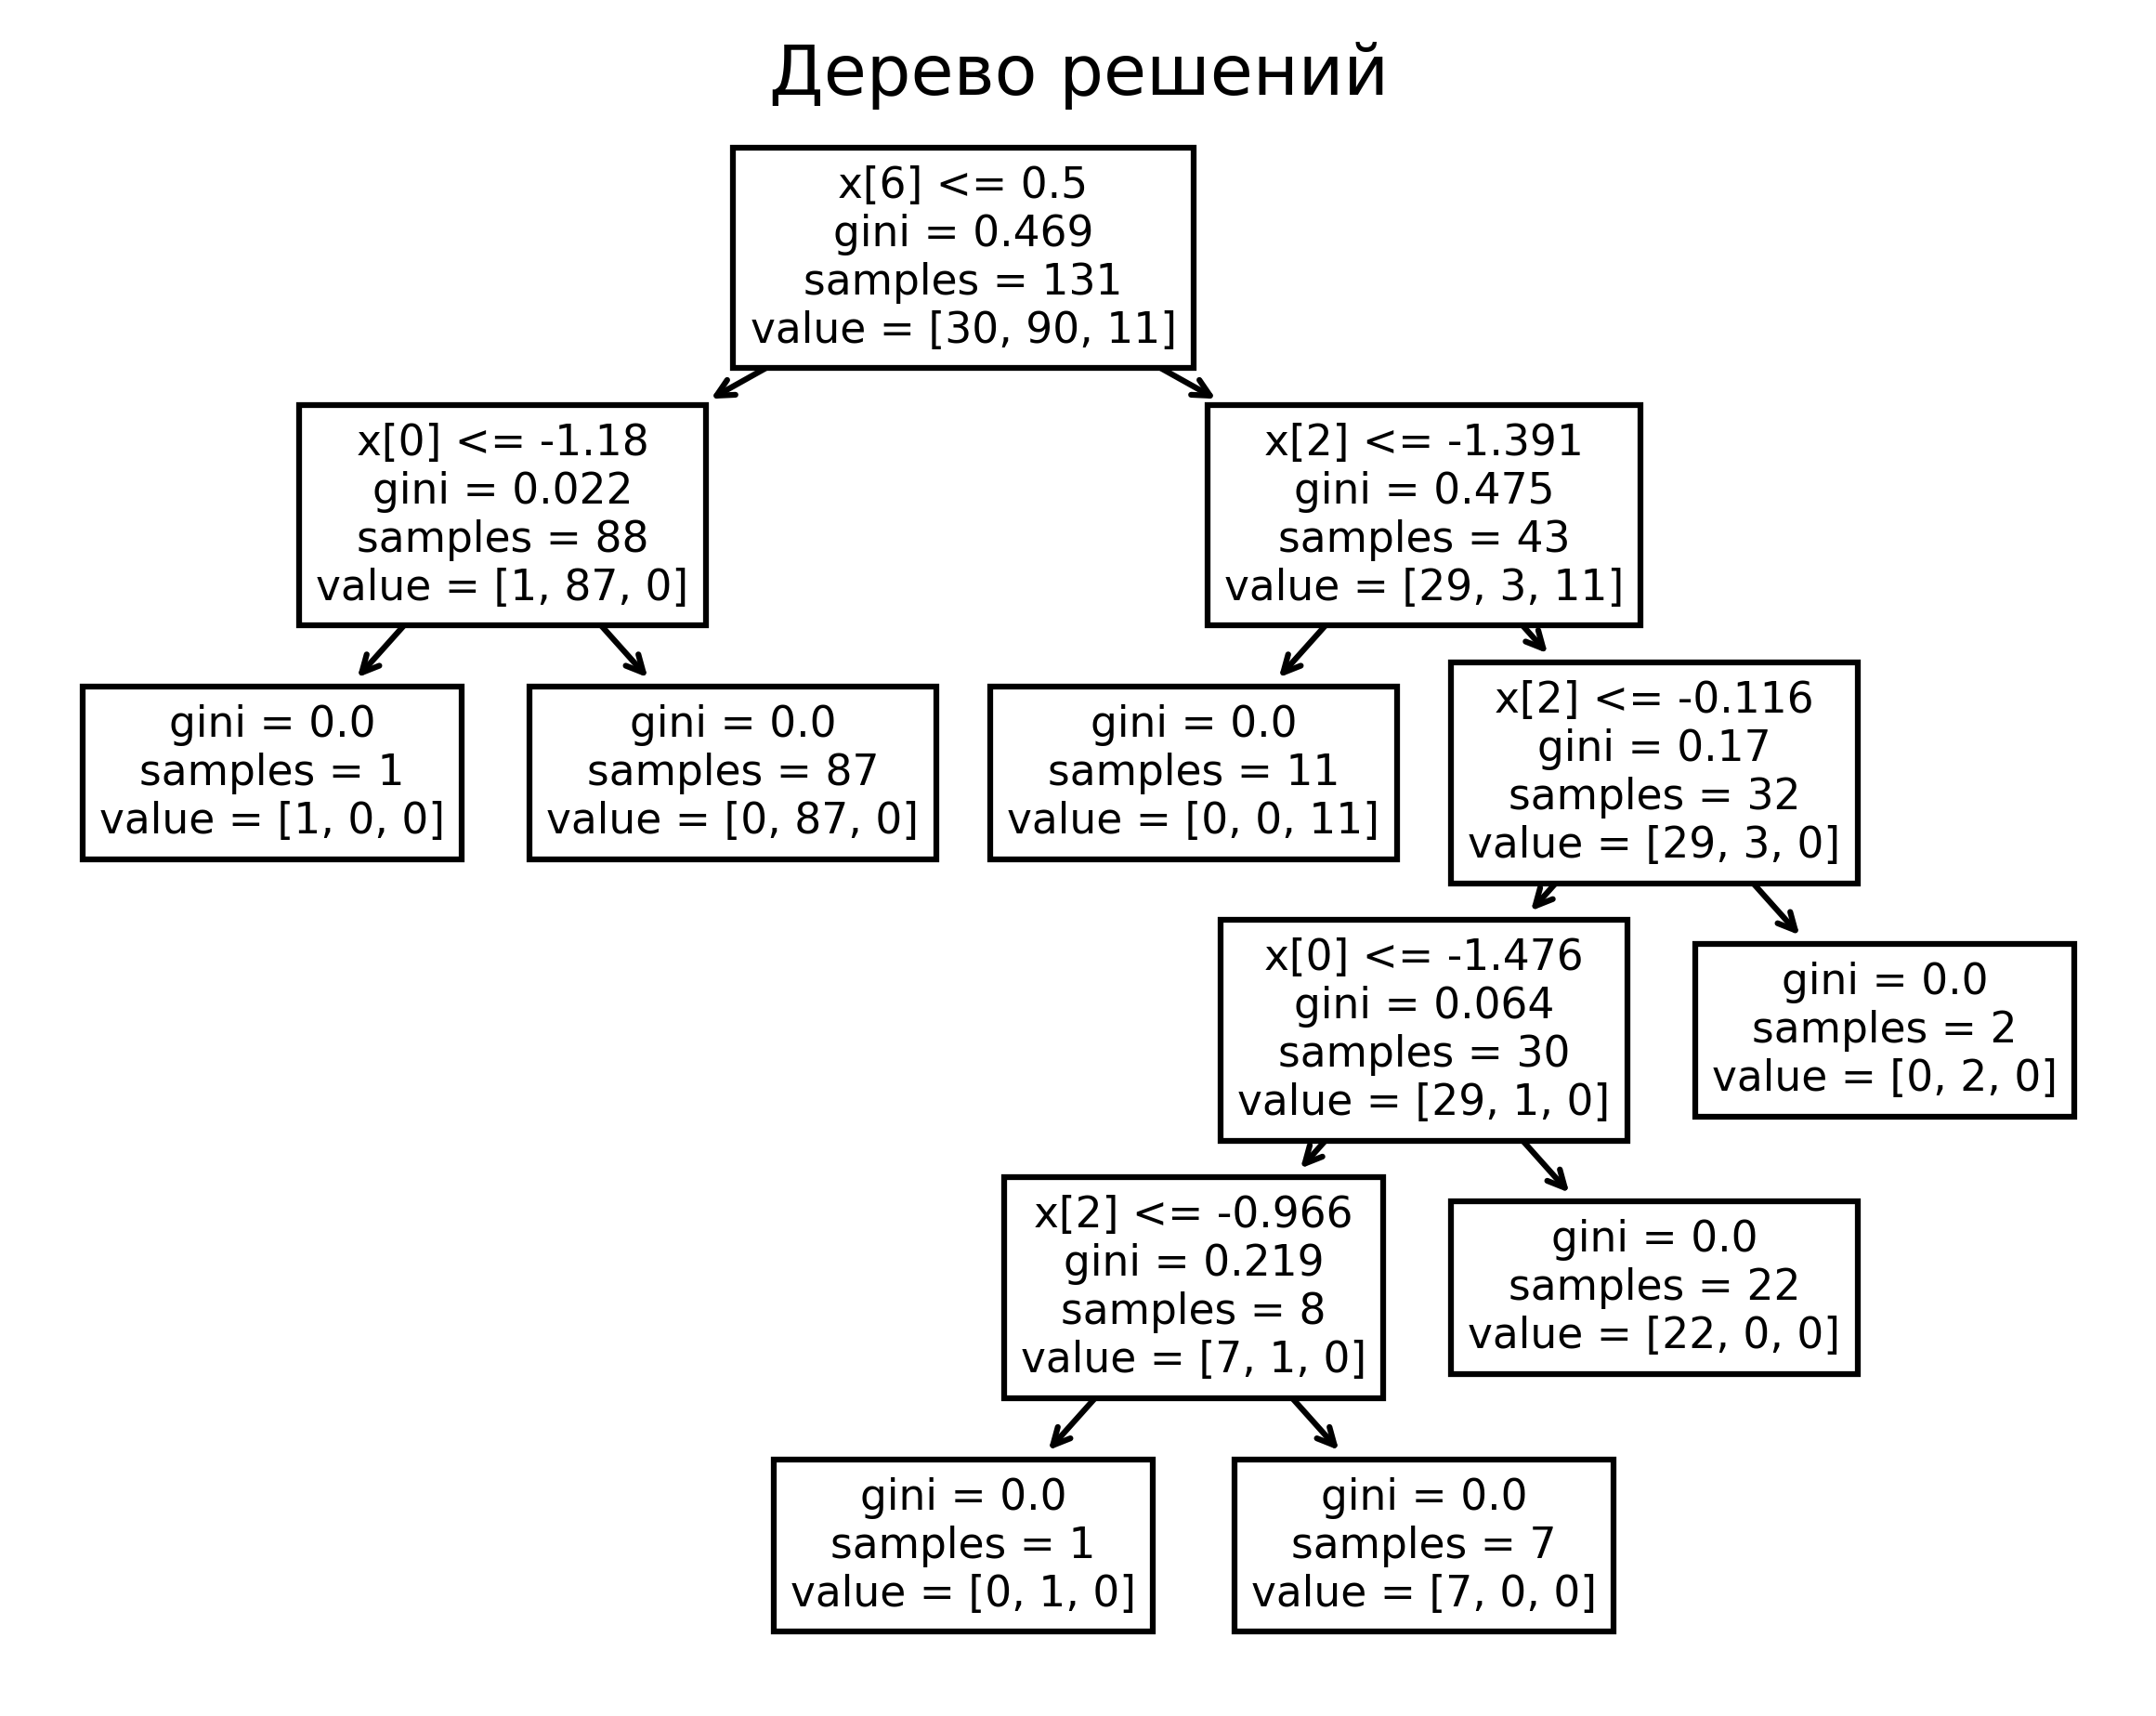

In [7]:
DPI = 450
plt.figure(dpi=DPI)
tree.plot_tree(model)
plt.title("Дерево решений")
from sklearn.tree import export_text

tree_rules = export_text(model, feature_names=list(train_input.columns))
print(tree_rules)